In [50]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize']=(12,6)
sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-default-prediction/Default_Fin.csv


In [19]:
data=pd.read_csv("/kaggle/input/loan-default-prediction/Default_Fin.csv")
data.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [20]:
data.shape

(10000, 5)

The dataset has 10000 rows and 5 columns.

In [21]:
data.isnull().sum()

Index            0
Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

## The dataset has no missing values.

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          10000 non-null  int64  
 1   Employed       10000 non-null  int64  
 2   Bank Balance   10000 non-null  float64
 3   Annual Salary  10000 non-null  float64
 4   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB


The dataset has these datatypes-
1. int
2. float

In [23]:
data.describe()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,0.705600,10024.498524,402203.782224,0.033300
std,2886.89568,0.455795,5804.579486,160039.674988,0.179428
min,1.00000,0.000000,0.000000,9263.640000,0.000000
25%,2500.75000,0.000000,5780.790000,256085.520000,0.000000
50%,5000.50000,1.000000,9883.620000,414631.740000,0.000000
75%,7500.25000,1.000000,13995.660000,525692.760000,0.000000
max,10000.00000,1.000000,31851.840000,882650.760000,1.000000


* The average Bank Balance of the people is around 10024.498524.
* Mostly the people has an annual salary oof approximately 402203.782224.
* 33% of them have experienced loan defaults.

<function matplotlib.pyplot.show(close=None, block=None)>

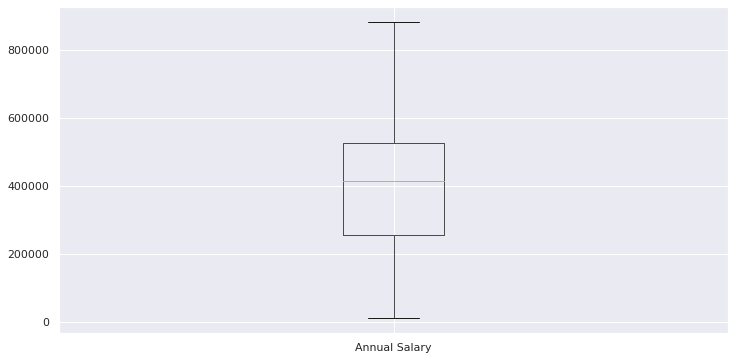

In [24]:
data.boxplot(column=['Annual Salary'])
plt.show

## It can be seen that there is no outlier present in the data.

<AxesSubplot:>

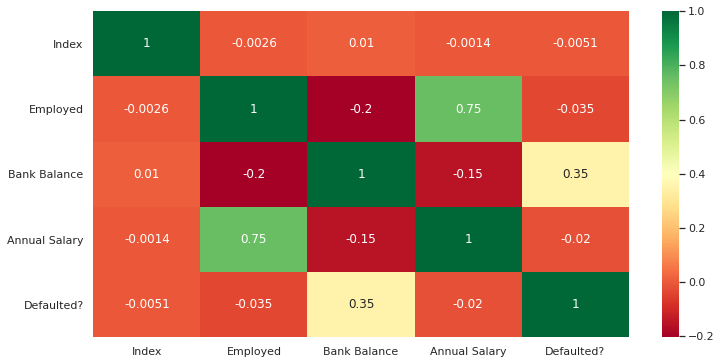

In [25]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')

## We can see that there is a moderate level of correlation in between Bank Balance and the Default status, and high correlation among Annual Salary and Bank Balance.

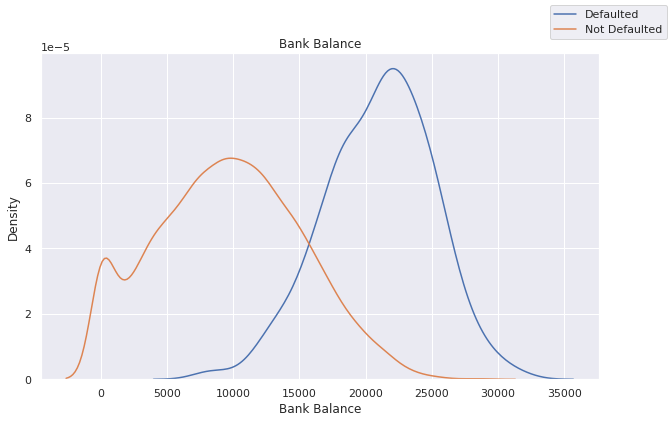

In [26]:
fig = plt.figure(figsize=(10,6))

sns.kdeplot(data[data['Defaulted?']==1]['Bank Balance'])
sns.kdeplot(data[data['Defaulted?']==0]['Bank Balance'])

fig.legend(labels=['Defaulted', 'Not Defaulted'])
plt.title('Bank Balance')
plt.show()

> > ## We get the insight that the ones getting defaulted have higher bank balance.

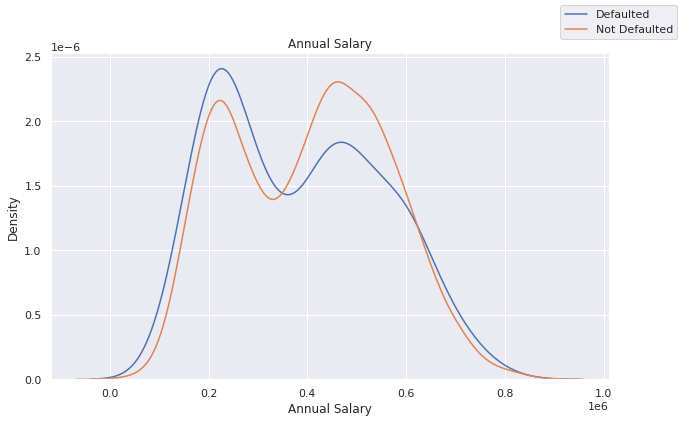

In [27]:
fig = plt.figure(figsize=(10,6))

sns.kdeplot(data[data['Defaulted?']==1]['Annual Salary'])
sns.kdeplot(data[data['Defaulted?']==0]['Annual Salary'])

fig.legend(labels=['Defaulted', 'Not Defaulted'])
plt.title('Annual Salary')
plt.show()

## The ones mostly getting deafulted for loans have lesser annual salary.

<AxesSubplot:xlabel='Defaulted?', ylabel='count'>

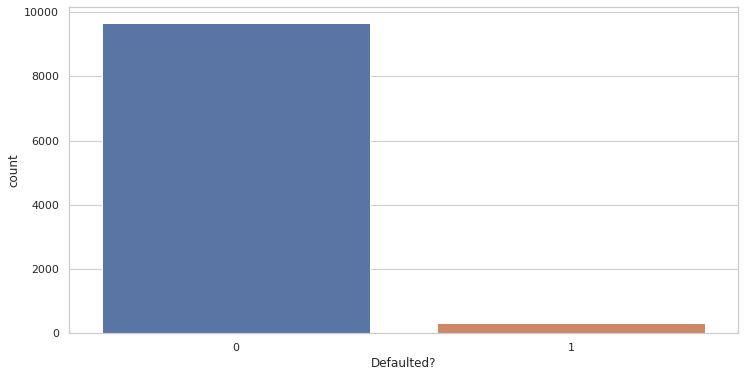

In [28]:
sns.set_style('whitegrid')
sns.countplot(x='Defaulted?',data=data)

<AxesSubplot:xlabel='Employed', ylabel='count'>

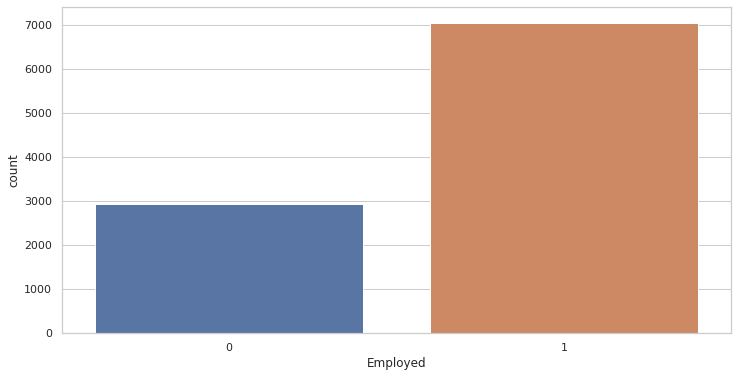

In [29]:
sns.set_style('whitegrid')
sns.countplot(x='Employed',data=data)

In [39]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [41]:
feature_cols = ['Employed', 'Bank Balance', 'Annual Salary']

''' Normalize the distribution. '''
scaler = MinMaxScaler()
data[feature_cols] = scaler.fit_transform(data[feature_cols])

# **Training**

In [42]:
X = data[feature_cols]
y = data['Defaulted?']

validation_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, random_state=4, stratify=y)

# **1.Logistic Regression**

In [60]:
model1=LogisticRegression(class_weight='balanced')
model1.fit(X_train,y_train)
model1.fit(X_test,y_test)
Prediction=model1.predict(X_train)
C=confusion_matrix(y_train,Prediction)
C_R=classification_report(y_train,Prediction)
print("Test Metrics for train_data:")
print(C)
print(C_R)


Test Metrics for train_data:
[[6711 1023]
 [  29  237]]
              precision    recall  f1-score   support

           0       1.00      0.87      0.93      7734
           1       0.19      0.89      0.31       266

    accuracy                           0.87      8000
   macro avg       0.59      0.88      0.62      8000
weighted avg       0.97      0.87      0.91      8000



In [49]:
Prediction= model1.predict(X_test)
C_=confusion_matrix(y_test,Prediction)
C_R_=classification_report(y_test,Prediction)
print("Test Metrics for test_data:")
print(C_)
print(C_R_)

Test Metrics for test_data:
[[1684  249]
 [   7   60]]
              precision    recall  f1-score   support

           0       1.00      0.87      0.93      1933
           1       0.19      0.90      0.32        67

    accuracy                           0.87      2000
   macro avg       0.60      0.88      0.62      2000
weighted avg       0.97      0.87      0.91      2000



# **2. DECISION TREE CLASSIFIER**

In [51]:
model2=DecisionTreeClassifier(random_state=0)
model2.fit(X_train,y_train)
model2.fit(X_test,y_test)
Prediction=model2.predict(X_train)
C=confusion_matrix(y_train,Prediction)
C_R=classification_report(y_train,Prediction)
print("Test Metrics for train_data:")
print(C)
print(C_R)

Test Metrics for train_data:
[[7578  156]
 [ 174   92]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7734
           1       0.37      0.35      0.36       266

    accuracy                           0.96      8000
   macro avg       0.67      0.66      0.67      8000
weighted avg       0.96      0.96      0.96      8000

